In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random
from sklearn.cluster import KMeans
import os
import math
import seaborn as sns; sns.set()
from pandasql import sqldf
pysql = lambda q: sqldf(q, globals())

## ETL Section

In [2]:
data = pd.read_csv("who-suicide-statistics/who_suicide_statistics.csv")
data.head(7)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0


In [3]:
print(os.getcwd())

/home/ambiguity/Documents/DataMining


In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [6]:
#Creating Male Column
male = pysql("Select * From data Where sex = 'male'")
male.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,male,15-24 years,NaN,301400.0
1,Albania,1985,male,25-34 years,NaN,264200.0
2,Albania,1985,male,35-54 years,NaN,296700.0
3,Albania,1985,male,5-14 years,NaN,325800.0
4,Albania,1985,male,55-74 years,NaN,132500.0


In [7]:
#Removing all records that have NAN suicide_no
newData = pd.DataFrame(data.dropna(subset=['suicides_no']))



In [8]:
#pd.set_option('display.max_rows', None)
usa =  pysql("select * from data where country = 'United States of America' ")
usa.head()

,country,year,sex,age,suicides_no,population
0,United States of America,1979,female,15-24 years,1001.0,21039000.0
1,United States of America,1979,female,25-34 years,1352.0,18176000.0
2,United States of America,1979,female,35-54 years,2458.0,24669000.0
3,United States of America,1979,female,5-14 years,48.0,17317000.0
4,United States of America,1979,female,55-74 years,1705.0,20097000.0


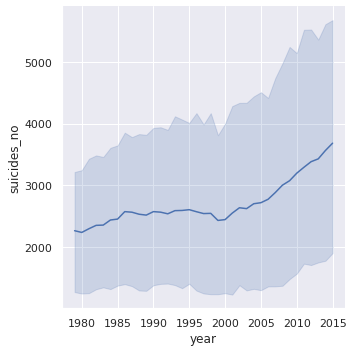

In [9]:
sns.relplot(x='year', y='suicides_no', kind='line', data=usa)

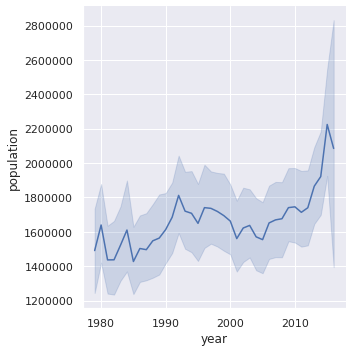

In [10]:
sns.relplot(x='year', y='population', kind='line', data=data)

### Encoding Age range 

In [11]:
#viewing all age categories
ageCat = pysql("Select Distinct age from newData ")
ageCat

,age
0,15-24 years
1,25-34 years
2,35-54 years
3,5-14 years
4,55-74 years
5,75+ years


In [12]:
#converting age column from object data type to categorical
newData['age']=newData['age'].astype('category')
#viewing Data types
newData.dtypes

country          object
year              int64
sex              object
age            category
suicides_no     float64
population      float64
dtype: object

In [13]:
#Converting age category to int64 representation using label encoding
newData['age_cat'] = newData['age'].cat.codes
newData.head(15)

,country,year,sex,age,suicides_no,population,age_cat
24,Albania,1987,female,15-24 years,14.0,289700.0,0
25,Albania,1987,female,25-34 years,4.0,257200.0,1
26,Albania,1987,female,35-54 years,6.0,278800.0,2
27,Albania,1987,female,5-14 years,0.0,311000.0,3
28,Albania,1987,female,55-74 years,0.0,144600.0,4
29,Albania,1987,female,75+ years,1.0,35600.0,5
30,Albania,1987,male,15-24 years,21.0,312900.0,0
31,Albania,1987,male,25-34 years,9.0,274300.0,1
32,Albania,1987,male,35-54 years,16.0,308000.0,2
33,Albania,1987,male,5-14 years,0.0,338200.0,3


# IGNORE THIS PART was just testing calculations using the new encoded data to make sure calcs can be done easily... Short answer Yes ... review the exmaple below if interested. 

In [14]:
pysql("Select Count(age_cat) as Count from newData where sex='male' and country = 'United States of America' and suicides_no > 0.0 and age_cat = 3")

,Count
0,37


In [15]:
test = newData.copy()

In [16]:
test['country']=test['country'].astype('category')
test['country_cat'] = test['country'].cat.codes
test.head()

,country,year,sex,age,suicides_no,population,age_cat,country_cat
24,Albania,1987,female,15-24 years,14.0,289700.0,0,0
25,Albania,1987,female,25-34 years,4.0,257200.0,1,0
26,Albania,1987,female,35-54 years,6.0,278800.0,2,0
27,Albania,1987,female,5-14 years,0.0,311000.0,3,0
28,Albania,1987,female,55-74 years,0.0,144600.0,4,0


In [17]:
pysql("Select count(country_cat) from test where year= 2000 and suicides_no > 0.0 and country_cat= 130")

,count(country_cat)
0,11


In [18]:
#trying label encoding
test_data = newData

dums = pd.get_dummies(test_data.country)
dums.head(10)

,Albania,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA),Zimbabwe
24,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


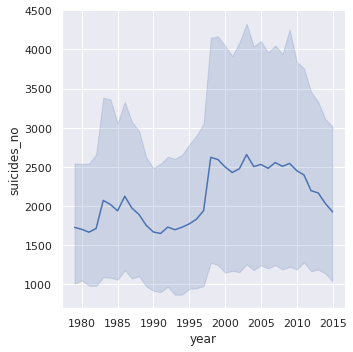

In [19]:
#suicide percentage increase in Japan over period

jpn_rates = pysql("SELECT * FROM test_data WHERE country = 'Japan'")
jpn_rates['suicides_no'].iloc[len(jpn_rates)-1]

present = jpn_rates['suicides_no'].iloc[len(jpn_rates)-1]
past = jpn_rates['suicides_no'].iloc[0]
yrs = jpn_rates['year'].max() - jpn_rates['year'].min()

#rate = ( pow((f/s),(1/y))-1)
diff = round((present/past), 4)
yrs_frac = round((1/yrs), 4)

rate = ((pow(diff, yrs_frac)-1)*100)

#print(round(rate, 1),'%')

sns.relplot(x='year', y='suicides_no', kind='line', data=jpn_rates)

#on average, rates grew 3.1 per year

In [20]:
#differnce between genders

female = pysql("Select suicides_no from test_data WHERE sex = 'female'")
male = pysql("Select suicides_no from test_data WHERE sex = 'male'")

fem_count   = female['suicides_no'].sum()
male_count  = male['suicides_no'].sum()
total_count = test_data['suicides_no'].sum()

male_percentage   = ((male_count/total_count)*100) 
female_percentage = ((fem_count/total_count)*100) 

perc_diff = round((male_percentage - female_percentage), 1)

print('There is a', perc_diff,'% difference betweeen male and female suicides globally')


There is a 52.6 % difference betweeen male and female suicides globally


In [21]:
res = []
genders = ['male', 'female']
for i in range(0, 2):
    for k in range(0, 5):
        amnt = test_data['suicides_no'].loc[ (test_data['sex'] == genders[i]) & (test_data['age']==ageCat['age'][k]) ].sum() 
        res.append([genders[i],ageCat['age'][k], amnt])
res

[['male', '15-24 years', 762550.0],
 ['male', '25-34 years', 1109311.0],
 ['male', '35-54 years', 2286377.0],
 ['male', '5-14 years', 42668.0],
 ['male', '55-74 years', 1429445.0],
 ['female', '15-24 years', 221737.0],
 ['female', '25-34 years', 258022.0],
 ['female', '35-54 years', 609011.0],
 ['female', '5-14 years', 20644.0],
 ['female', '55-74 years', 529023.0]]

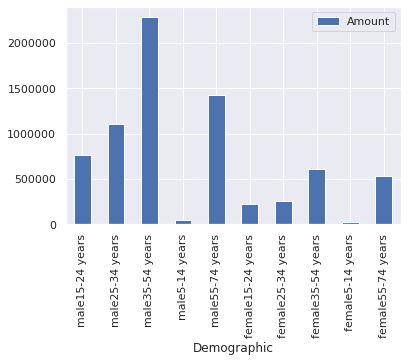

In [22]:
#Which demographic has highest rate of suicide

#distinct age ranges
#ageCat is from above query

genders = ['male', 'female']
max = 0
demo = []
amt = 0

demo_info = []
demo_tot = []


for i in range(0, 2):
    for k in range(0, 5): 
        #select and count all suicides where each of 10 combinations are met
        amnt = test_data['suicides_no'].loc[ (test_data['sex'] == genders[i]) & (test_data['age']==ageCat['age'][k])].sum()
        demo_info.append(genders[i]+''+ageCat['age'][k])
        demo_tot.append(amnt)
        if amnt > max:
            max = amnt
            demo.append(genders[i])
            demo.append(ageCat['age'][k])
            demo.append(amnt)


# dictionary of lists  
dict = {'Demographic': demo_info, 'Amount': demo_tot}

#create dataframe from dict of lists
demo_df = pd.DataFrame(dict)  

#plot bar graph to show results
demo_df.plot.bar(x='Demographic', y='Amount')
plt.show()

#print('The',demo[0], demo[1],' demographic had highest rates of suicides with',demo[2], 'suicides over the period') 

Text(0, 0.5, 'Total_Suicide')

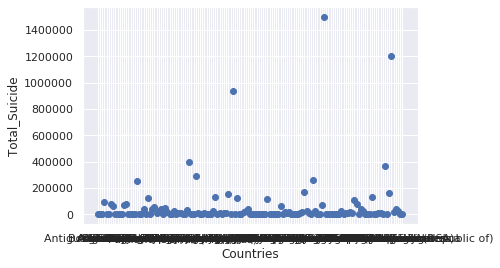

In [23]:
#grouping and summing suicide data for all countries

tData = newData

sums = []
countries = []

country = pysql("SELECT DISTINCT country from newData")

#add each country from dataframe to list
for k in range(0, 141):
    countries.append(country['country'][k])

#get sum of each country
for i in range(0, len(countries)):
    sums.append(tData['suicides_no'].loc[ (tData['country'] == countries[i])].sum())

# dictionary of lists  
dict2 = {'Countries': countries, 'Total_Suicide': sums}

#create dataframe from dict of lists
countries_df = pd.DataFrame(dict2) 


#plot
plt.scatter(countries_df.Countries,countries_df.Total_Suicide)
plt.xlabel('Countries')
plt.ylabel('Total_Suicide')

In [33]:
#OHE of countries
dums = pd.get_dummies(countries_df.Countries)

#merging dataset with dummies
merged=pd.concat([countries_df, dums], axis='columns', sort=True)

merged = merged.drop(['Countries','Zimbabwe'], axis='columns')
merged


,Total_Suicide,Albania,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,Turkmenistan,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA)
0,1970.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,93862.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2422.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,14647.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
137,44063.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
138,29504.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
139,113.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
x = merged.iloc[:,0:1]

km = KMeans(n_clusters=3)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
y_predicted = km.fit_predict(x)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 0, 0, 0, 0, 0], dtype=int32)

In [36]:
merged['Clusters'] = y_predicted
merged.head(3)

,Total_Suicide,Albania,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA),Clusters
0,1970.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
km.cluster_centers_

array([[  12798.27419355],
       [1213335.66666667],
       [ 199961.57142857]])

In [38]:
#
df1 = merged[merged.Clusters==0]
df2 = merged[merged.Clusters==1]
df3 = merged[merged.Clusters==2]
plt.scatter(merged.Countries,merged['Total_Count'],color='green')
plt.scatter(merged.Countries,merged['Total_Count'],color='red')
plt.scatter(merged.Countries,merged['Total_Count'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Countries')
plt.ylabel('Total_Count')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'Countries'